In [1]:
# regular
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# audio
import librosa.display

In [2]:
project_path = Path("./")
dataset_path = project_path / "data"

In [ ]:
print(f"dataset folders: {[elem.name for elem in dataset_path.iterdir()]}")

dataset folders: ['testing', 'training', 'validation']


First we need to convert all our wav files into images to make the deep learning works. We can copy the code used in the original project linked at the beggining of the notebook.

In [5]:
test_sound = next((dataset_path / "training" / "real").iterdir())
test_sound

WindowsPath('data/training/real/file1000.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')

In [6]:
def create_spectrogram(audio_file: Path, image_file: Path, show: bool=False):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(str(audio_file))
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(str(image_file))
    if show:
      print(f"Saving test image result in: {image_file}")
      plt.show()
    plt.close(fig)

def create_pngs_from_wavs(input_files: list[Path], output_path: Path, show: bool=False):
    if not output_path.exists():
        output_path.mkdir(parents=True, exist_ok=True)

    for i, file_path in enumerate(tqdm(input_files)):
        output_file = (output_path / file_path.name).with_suffix(".png")
        if not output_file.exists():
          create_spectrogram(file_path, output_file, show)

In [7]:
test_files = [test_sound]

  0%|          | 0/1 [00:00<?, ?it/s]

Saving test image result in: test\file1000.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.png


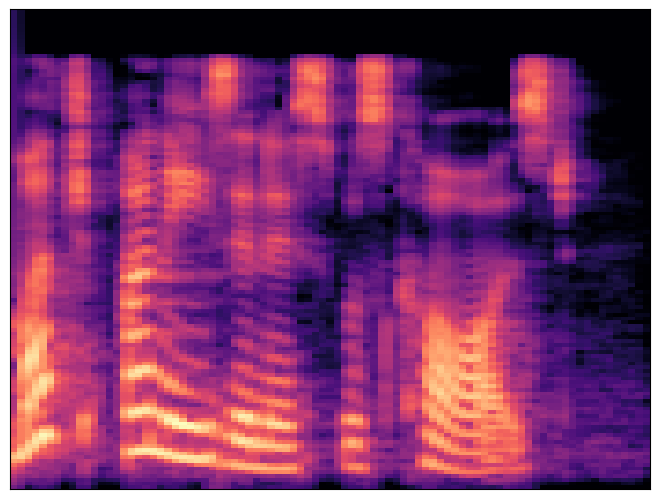

100%|██████████| 1/1 [00:04<00:00,  4.26s/it]


In [8]:
test_img_dataset_path = project_path / "test"
create_pngs_from_wavs(test_files, test_img_dataset_path, show=True)

In [9]:
img_dataset_path = dataset_path / "imgs"

In [10]:
for type_ in ["real", "fake"]:
  training_imgs = [path for path in (dataset_path / "training" / type_).iterdir()]
  testing_imgs = [path for path in (dataset_path / "testing" / type_).iterdir()]
  validation_imgs = [path for path in (dataset_path / "validation" / type_).iterdir()]

  create_pngs_from_wavs(training_imgs, img_dataset_path / "training" / type_)
  create_pngs_from_wavs(testing_imgs, img_dataset_path / "testing" / type_)
  create_pngs_from_wavs(validation_imgs, img_dataset_path / "validation" / type_)

100%|██████████| 1413/1413 [00:00<00:00, 4860.81it/s]
